# Import Package

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define useful function

In [24]:
def norm(arr: np.ndarray):
    return np.sqrt(np.sum(arr**2))

def project(u: np.ndarray, v: np.ndarray):
    """
    Projection function which project vector v on vector u;
    """
    return u.dot(v) / u.dot(u) * u

# Gram-Schmdit Process Explanation

Suppose we place the IMU sensor with random pose and keep it **static**, 
We can read the value (accelX, accelY, accelZ) from the accelerometer.  
The magnitude of the accelerometer should be about 9.81 [m/$s^2$] because the only acceleration it received is gravity:  
$magnitude = {\lVert \vec{v} \rVert}_2 = \sqrt{\sum_{i=1}^{N} {v_i}^2} = \sqrt{accelX^2 + accelY^2 + accelZ^2} \approx 9.81$

In [71]:
# Given the random reasonable values read from accelerometer
accel = np.array([4.29, 5.34, 7.02])
print(norm(accel))

# Transform unit from m/s^2 to gravity for better visualization
accel = accel / norm(accel)
print(accel)

9.808164965986247
[0.43739069 0.54444435 0.71573021]


## Purpose of The Gram-Schmdit Process
In global coordinate, suppose three orthonormal basis are:  
$accel^X_G: (1, 0, 0)$  
$accel^Y_G: (0, 1, 0)$  
$accel^Z_G: (0, 0, 1)$  

Assume the gravity direction in global coordinate is vertical to the ground:  
$gravity_G = accel^Z_G = (0, 0, 1)$  

Because the IMU now is static, let the acceleration vector $(0.43739069, 0.54444435, 0.71573021)$ be the gravity direction in IMU coordinate:  
$gravity_{IMU} = accel^Z_{IMU} = (0.43739069, 0.54444435, 0.71573021)$

The purpose of the Gram-Schmdit process is to find the other two orthonormal basis which are orthogonal to $gravity_{IMU}$ in IMU coordinate.  

Then we can get the relation between the global coordinate and the IMU coordinate as follow:  
$accel^X_G \Leftrightarrow accel^X_{IMU}$  
$accel^Y_G \Leftrightarrow accel^Y_{IMU}$  
$accel^Z_G \Leftrightarrow accel^Z_{IMU}$  

$\Rightarrow$  

$(1, 0, 0) \Leftrightarrow (?, ?, ?)$  
$(0, 1, 0) \Leftrightarrow (?, ?, ?)$  
$(0, 0, 1) \Leftrightarrow (0.43739069, 0.54444435, 0.71573021)$



In [61]:
# Initialize global orthonormal basis
accel_x_g = np.array([1, 0, 0])
accel_y_g = np.array([0, 1, 0])
accel_z_g = np.array([0, 0, 1])

## Plot Acceleration Vector In Global Coordinate

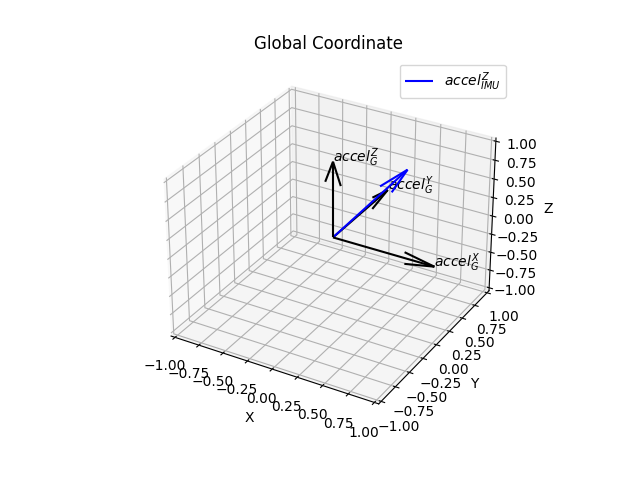

In [62]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Global Coordinate')

ax.quiver(0, 0, 0, accel_x_g[0], accel_x_g[1], accel_x_g[2], color='black')
ax.quiver(0, 0, 0, accel_y_g[0], accel_y_g[1], accel_y_g[2], color='black')
ax.quiver(0, 0, 0, accel_z_g[0], accel_z_g[1], accel_z_g[2], color='black')
ax.text(accel_x_g[0], accel_x_g[1], accel_x_g[2], r'$accel^X_G$')
ax.text(accel_y_g[0], accel_y_g[1], accel_y_g[2], r'$accel^Y_G$')
ax.text(accel_z_g[0], accel_z_g[1], accel_z_g[2], r'$accel^Z_G$')

ax.quiver(0, 0, 0, accel[0], accel[1], accel[2], color='blue', label=r'$accel^Z_{IMU}$')

ax.legend()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Step 1
Let the raw acceleration = $\vec{v_1}$ and $\vec{u_1} = \vec{v_1}$  
So $\vec{e_1} = \frac{\vec{u_1}}{\lVert \vec{u_1} \rVert}$

In [63]:
u1 = v1 = accel
e1 = u1 / norm(u1)
print('u1:', u1)
print('e1:', e1)

u1: [0.43739069 0.54444435 0.71573021]
e1: [0.43739069 0.54444435 0.71573021]


## Step 2
Project $accel^X_G$ on $accel^Z_{IMU}$ and find the orthogonal vector to $accel^Z_{IMU}$.

In [64]:
v2 = accel_x_g
proj_u1_v2 = project(u1, v2)
u2 = v2 - proj_u1_v2
e2 = u2 / norm(u2)
print('u2:', u2)
print('e2:', e2)

# Check if e1 and e2 are orthogonal
assert e1.dot(e2) < 1e-6, 'e1 and e2 are not orthogonal'

u2: [ 0.80868939 -0.23813489 -0.31305373]
e2: [ 0.89927159 -0.26480864 -0.34811923]


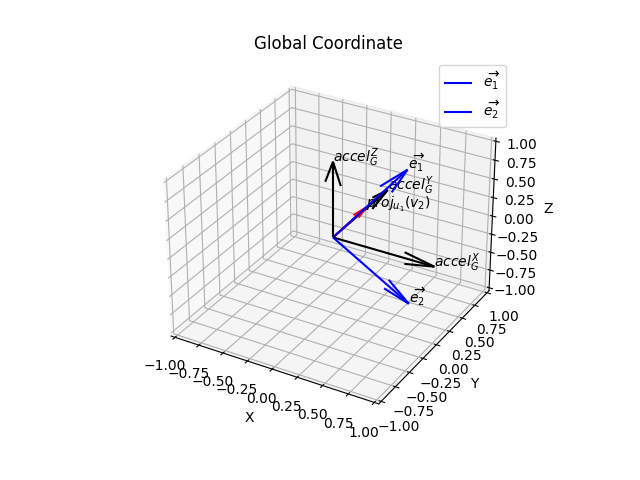

In [65]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Global Coordinate')

ax.quiver(0, 0, 0, accel_x_g[0], accel_x_g[1], accel_x_g[2], color='black')
ax.quiver(0, 0, 0, accel_y_g[0], accel_y_g[1], accel_y_g[2], color='black')
ax.quiver(0, 0, 0, accel_z_g[0], accel_z_g[1], accel_z_g[2], color='black')
ax.text(accel_x_g[0], accel_x_g[1], accel_x_g[2], r'$accel^X_G$')
ax.text(accel_y_g[0], accel_y_g[1], accel_y_g[2], r'$accel^Y_G$')
ax.text(accel_z_g[0], accel_z_g[1], accel_z_g[2], r'$accel^Z_G$')

ax.quiver(0, 0, 0, proj_u1_v2[0], proj_u1_v2[1], proj_u1_v2[2], color='red')
ax.text(proj_u1_v2[0], proj_u1_v2[1], proj_u1_v2[2], r'$proj_{u_1}(v_2)$')

ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='blue', label=r'$\vec{e_1}$')
ax.text(e1[0], e1[1], e1[2], r'$\vec{e_1}$')
ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='blue', label=r'$\vec{e_2}$')
ax.text(e2[0], e2[1], e2[2], r'$\vec{e_2}$')

ax.legend()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Step 3
Project $accel^Y_G$ on $accel^Z_{IMU}$ and find the orthogonal vector to $accel^Z_{IMU}$.

In [66]:
v3 = accel_y_g
proj_u1_v3 = project(u1, v3)
proj_u2_v3 = project(u2, v3)
u3 = v3 - proj_u1_v3 - proj_u2_v3
e3 = u3 / norm(u3)
print('u3:', u3)
print('e3:', e3)

# Check if e1, e2 and e3 are all orthogonal
assert e1.dot(e2) < 1e-6 and e1.dot(e3) < 1e-6 and e2.dot(e3) < 1e-6, 'e1, e2 and e3 are not orthogonal'

u3: [-2.77555756e-17  6.33456733e-01 -4.81860250e-01]
e3: [-3.48731968e-17  7.95899952e-01 -6.05428168e-01]


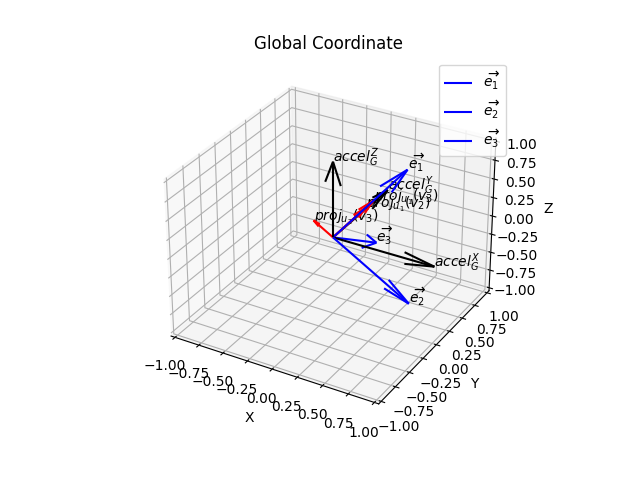

In [67]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Global Coordinate')

ax.quiver(0, 0, 0, accel_x_g[0], accel_x_g[1], accel_x_g[2], color='black')
ax.quiver(0, 0, 0, accel_y_g[0], accel_y_g[1], accel_y_g[2], color='black')
ax.quiver(0, 0, 0, accel_z_g[0], accel_z_g[1], accel_z_g[2], color='black')
ax.text(accel_x_g[0], accel_x_g[1], accel_x_g[2], r'$accel^X_G$')
ax.text(accel_y_g[0], accel_y_g[1], accel_y_g[2], r'$accel^Y_G$')
ax.text(accel_z_g[0], accel_z_g[1], accel_z_g[2], r'$accel^Z_G$')

ax.quiver(0, 0, 0, proj_u1_v2[0], proj_u1_v2[1], proj_u1_v2[2], color='red')
ax.text(proj_u1_v2[0], proj_u1_v2[1], proj_u1_v2[2], r'$proj_{u_1}(v_2)$')
ax.quiver(0, 0, 0, proj_u1_v3[0], proj_u1_v3[1], proj_u1_v3[2], color='red')
ax.text(proj_u1_v3[0], proj_u1_v3[1], proj_u1_v3[2], r'$proj_{u_1}(v_3)$')
ax.quiver(0, 0, 0, proj_u2_v3[0], proj_u2_v3[1], proj_u2_v3[2], color='red')
ax.text(proj_u2_v3[0], proj_u2_v3[1], proj_u2_v3[2], r'$proj_{u_2}(v_3)$')

ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='blue', label=r'$\vec{e_1}$')
ax.text(e1[0], e1[1], e1[2], r'$\vec{e_1}$')
ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='blue', label=r'$\vec{e_2}$')
ax.text(e2[0], e2[1], e2[2], r'$\vec{e_2}$')
ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='blue', label=r'$\vec{e_3}$')
ax.text(e3[0], e3[1], e3[2], r'$\vec{e_3}$')

ax.legend()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Step 4
Get the rotation matrix which can transform the global coordinate to the IMU coordinate:  
In IMU coordinate,  
$\vec{e_1}$ is z axis;  
$\vec{e_2}$ is x axis;  
$\vec{e_3}$ is y axis;  

So rotation matrix $R = \begin{bmatrix} \vec{e_1} & \vec{e_2} & \vec{e_3} \end{bmatrix} $  
Given an acceleration vector in global coordinate $\vec{a_G}$  
To transform $\vec{a_G}$ into IMU coordinate: $R \vec{a_G} = \overrightarrow{a_{IMU}}$  
To transform $\overrightarrow{a_{IMU}}$ back to global coordinate: $R^{-1} \overrightarrow{a_{IMU}} = \vec{a_G}$


In [70]:
rot_g_to_imu = np.array([
    #  X      Y      Z
    [e2[0], e3[0], e1[0]], 
    [e2[1], e3[1], e1[1]], 
    [e2[2], e3[2], e1[2]]
])

print(rot_g_to_imu.dot(accel_x_g))
print(rot_g_to_imu.dot(accel_y_g))
print(rot_g_to_imu.dot(accel_z_g))

rot_imu_to_g = np.linalg.inv(rot_g_to_imu)
print(rot_imu_to_g.dot(e1))

[ 0.89927159 -0.26480864 -0.34811923]
[-3.48731968e-17  7.95899952e-01 -6.05428168e-01]
[0.43739069 0.54444435 0.71573021]
[0.00000000e+00 5.55111512e-17 1.00000000e+00]
